# Ensemble Techniques Project <br> Thomas Webb
### October 19th, 2020
`Goal` - Using the data collected from existing customers, we will build a model that will help the marketing team increase their profit by more accurately identify customers who are relatively more likely to subscribe to a term deposit.<br><br>All data used in this project comes from the UCI Machine Learning Repository and can be found here: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing 

In [419]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(rc={'figure.figsize':(11,8.5)})

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score, accuracy_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from yellowbrick.classifier import ClassificationReport, ROCAUC


In [420]:
bank = pd.read_csv("bank-full.csv")

In [421]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [422]:
bank.shape

(45211, 17)

In [423]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


##### `Insights:`
- There are a few negative values for balance, which is completely possible considering a negative balance could indicate debt.
- There are a majority of values for pdays that are -1, which indicates the person has not bee contacted within 900 (or at all).

In [424]:
bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [425]:
print(bank.isnull().sum())
print("Total missing values:",bank.isnull().sum().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64
Total missing values: 0


##### `Insights:`
There are no missing values in this data set.

# Exploratory Data Analysis

## Client Data

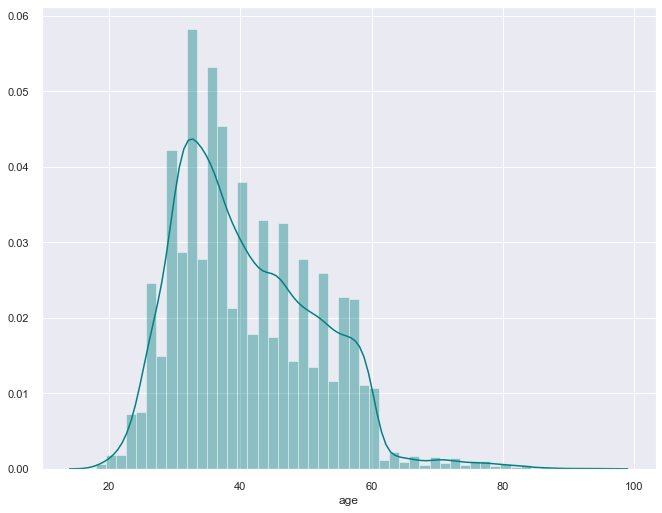

In [426]:
sns.distplot(bank['age'], color='teal')

##### `Insights:` 
Age is relatively evenly distributed, with a majority under 60, and a range from 18 to 95.

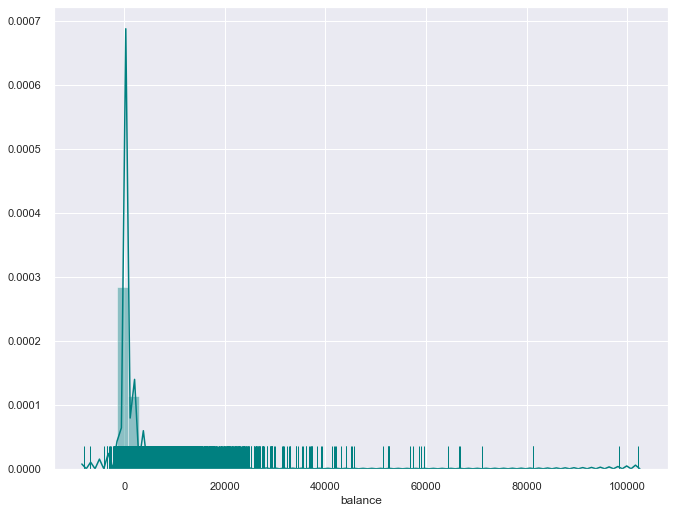

In [427]:
sns.distplot(bank['balance'], color='teal',rug=True)

##### `Insights:`
Bank account balance distribution is heavily left skewed, with a vast majority of values at or around zero, and a range from -8,019 to 102,127.

In [428]:
for i in ['job','marital','education','default','housing','loan']:
    print(i)
    print((bank[i].value_counts(normalize=True))*100)
    print()

job
blue-collar      21.525735
management       20.919688
technician       16.803433
admin.           11.437482
services          9.188029
retired           5.007631
self-employed     3.492513
entrepreneur      3.289023
unemployed        2.882042
housemaid         2.742695
student           2.074716
unknown           0.637013
Name: job, dtype: float64

marital
married     60.193316
single      28.289576
divorced    11.517109
Name: marital, dtype: float64

education
secondary    51.319369
tertiary     29.419831
primary      15.153392
unknown       4.107407
Name: education, dtype: float64

default
no     98.197341
yes     1.802659
Name: default, dtype: float64

housing
yes    55.583818
no     44.416182
Name: housing, dtype: float64

loan
no     83.977351
yes    16.022649
Name: loan, dtype: float64



##### `Insights:` 
A majority of clients in the dataset are well-educated and married, and a large majority of people do not have personal loans and only 1.8% of people have defaulted on a personal loan.

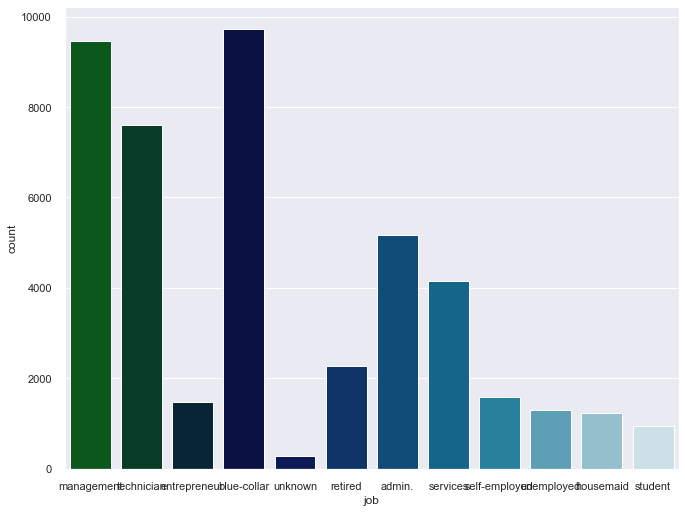

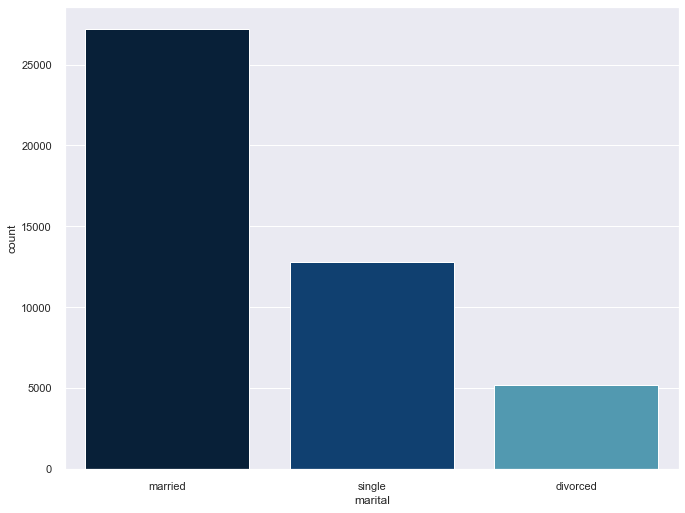

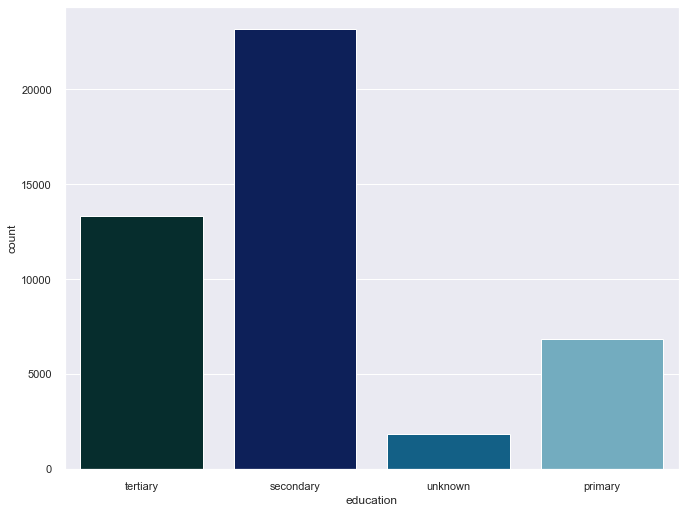

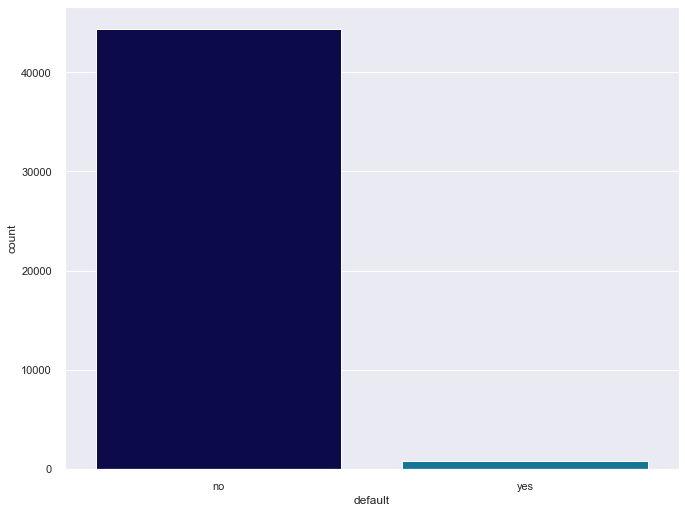

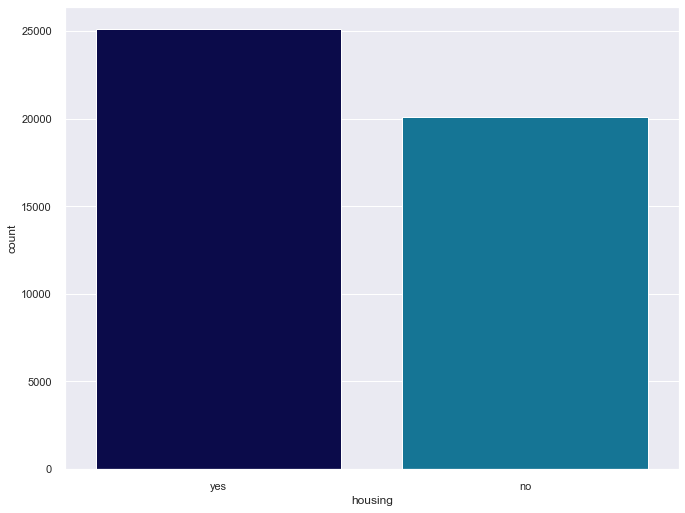

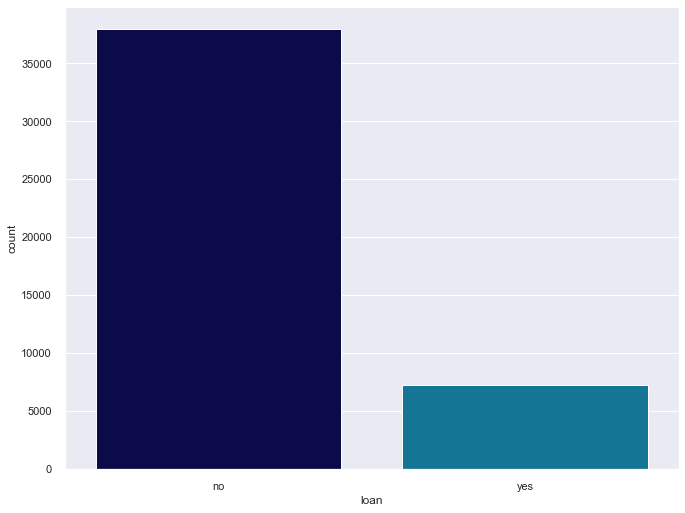

In [429]:
for i in ['job','marital','education','default','housing','loan']:
    sns.countplot(bank[i], palette='ocean')
    plt.show()

##### `Insights:`
- A majority of people are married, and educated.
- A small minority of people have taken loans, and a much smaller group have defaulted on loans.

## Previous Contact Data

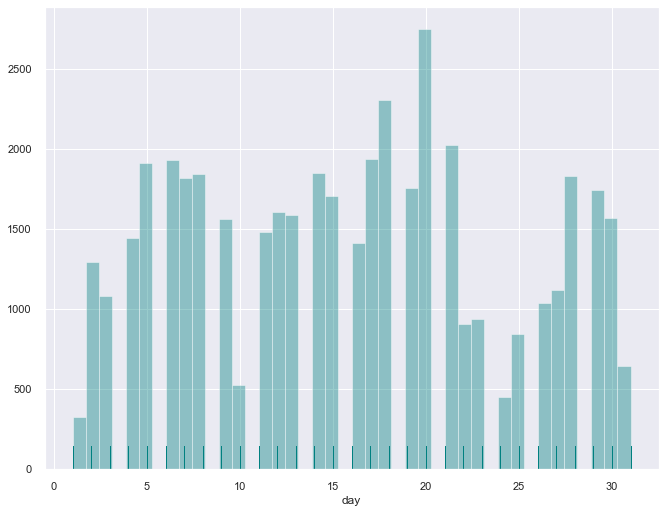

In [430]:
sns.distplot(bank['day'], color='teal',rug=True, kde=False)

##### `Insights:`
There is an even distribution of Contact Day, with no remarkable trends.

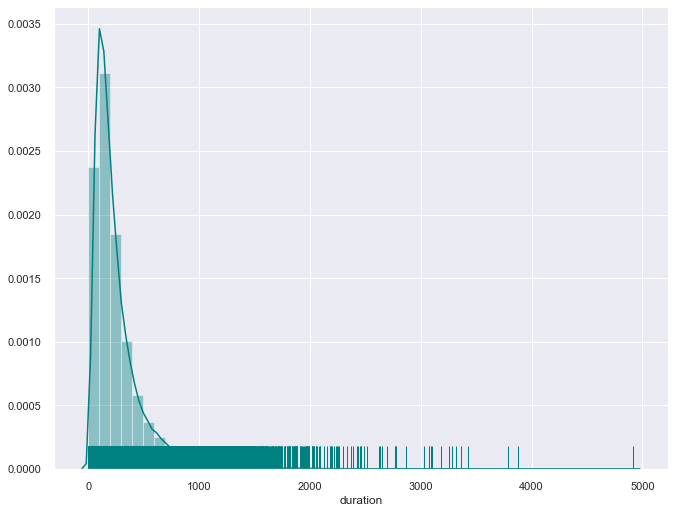

In [431]:
sns.distplot(bank['duration'], color='teal',rug=True)

##### `Insights`
Contact duration is highly skewed left with a vast majority of contacts lasting less than 5 minutes.

In [432]:
for i in ['contact','month']:
    print(i)
    print((bank[i].value_counts(normalize=True))*100)
    print()

contact
cellular     64.774059
unknown      28.798301
telephone     6.427639
Name: contact, dtype: float64

month
may    30.448342
jul    15.250713
aug    13.817434
jun    11.813497
nov     8.781049
apr     6.485147
feb     5.859194
jan     3.103227
oct     1.632346
sep     1.280662
mar     1.055053
dec     0.473336
Name: month, dtype: float64



##### `Insights:`
Contact data is slightly corrupted and has 28% unknown values, but a strong trend is seen in the Month data, with the vast majority of contacts occuring in the summer months.

## Additional Attributes

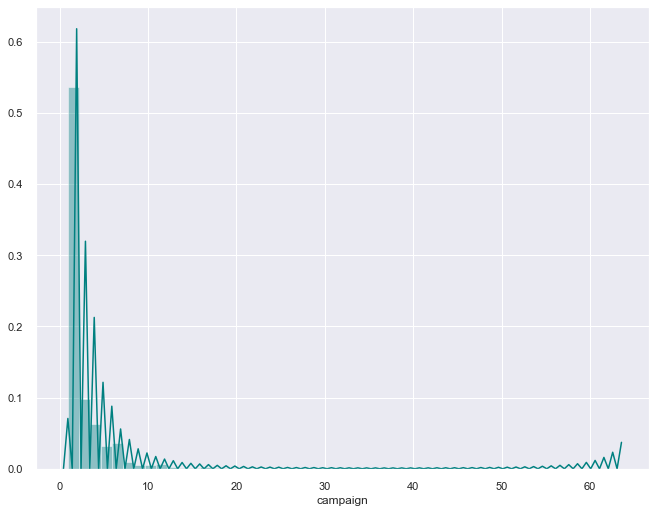

In [433]:
sns.distplot(bank['campaign'], color='teal')

##### `Insights:`
Data is very left skewed as a vast majority have been contacted fewer than 10 times.

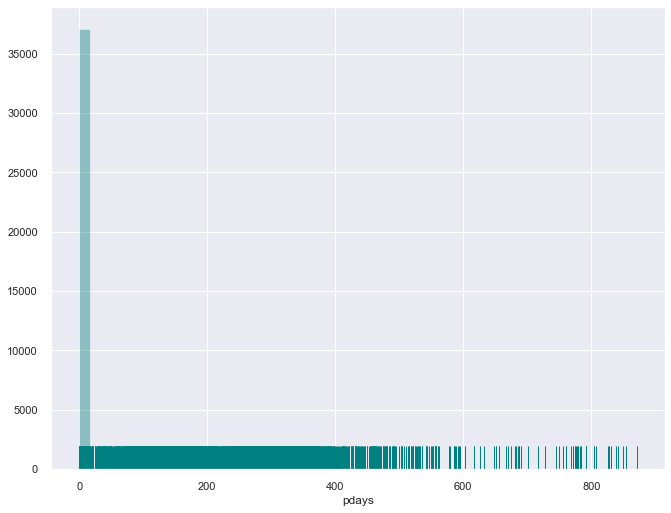

In [434]:
sns.distplot(bank['pdays'], kde=False, color='teal', rug=True)

##### `Insights:`
A vast majority of people in htis dataset have either never been contacted or it has been longer than 900 days since last contact.

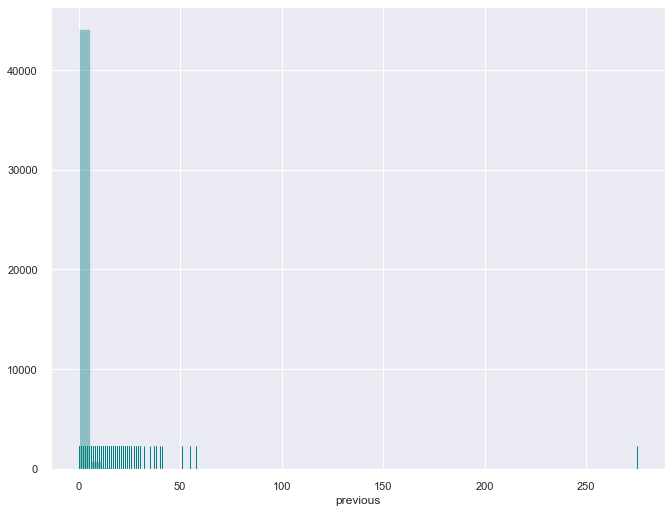

In [435]:
sns.distplot(bank['previous'],kde=False, color='teal',rug=True)

In [436]:
print((bank['poutcome'].value_counts(normalize=True))*100)

unknown    81.747805
failure    10.840282
other       4.069806
success     3.342107
Name: poutcome, dtype: float64


## Target Variable - Term Deposit

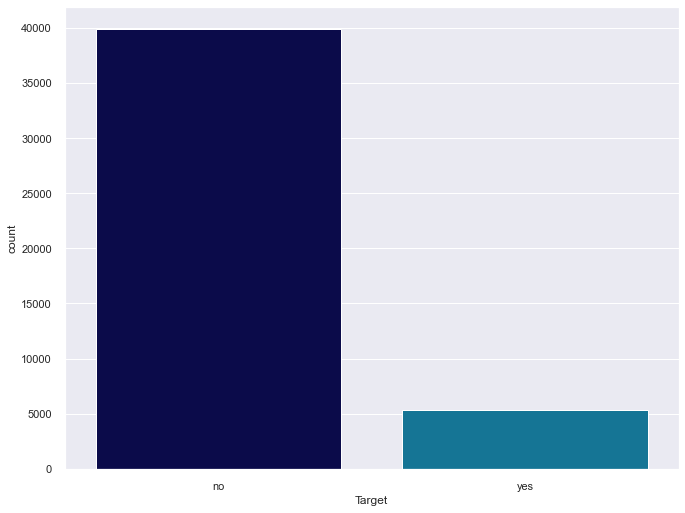

In [437]:
sns.countplot(bank['Target'], palette='ocean')

In [438]:
print((bank['Target'].value_counts(normalize=True))*100)

no     88.30152
yes    11.69848
Name: Target, dtype: float64


## Multivariate Analysis

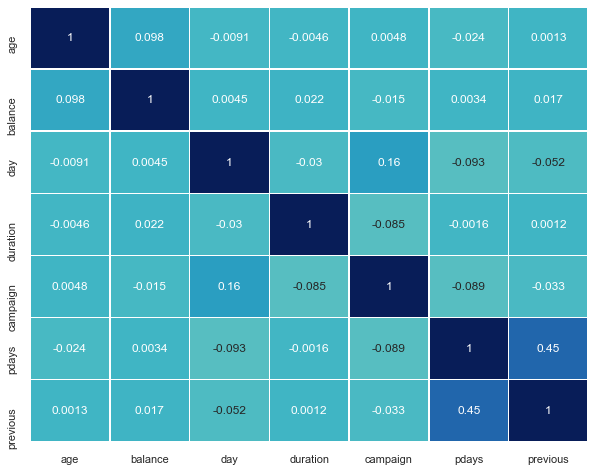

In [439]:
plt.figure(figsize=(10,8))

sns.heatmap(bank.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")

plt.show()

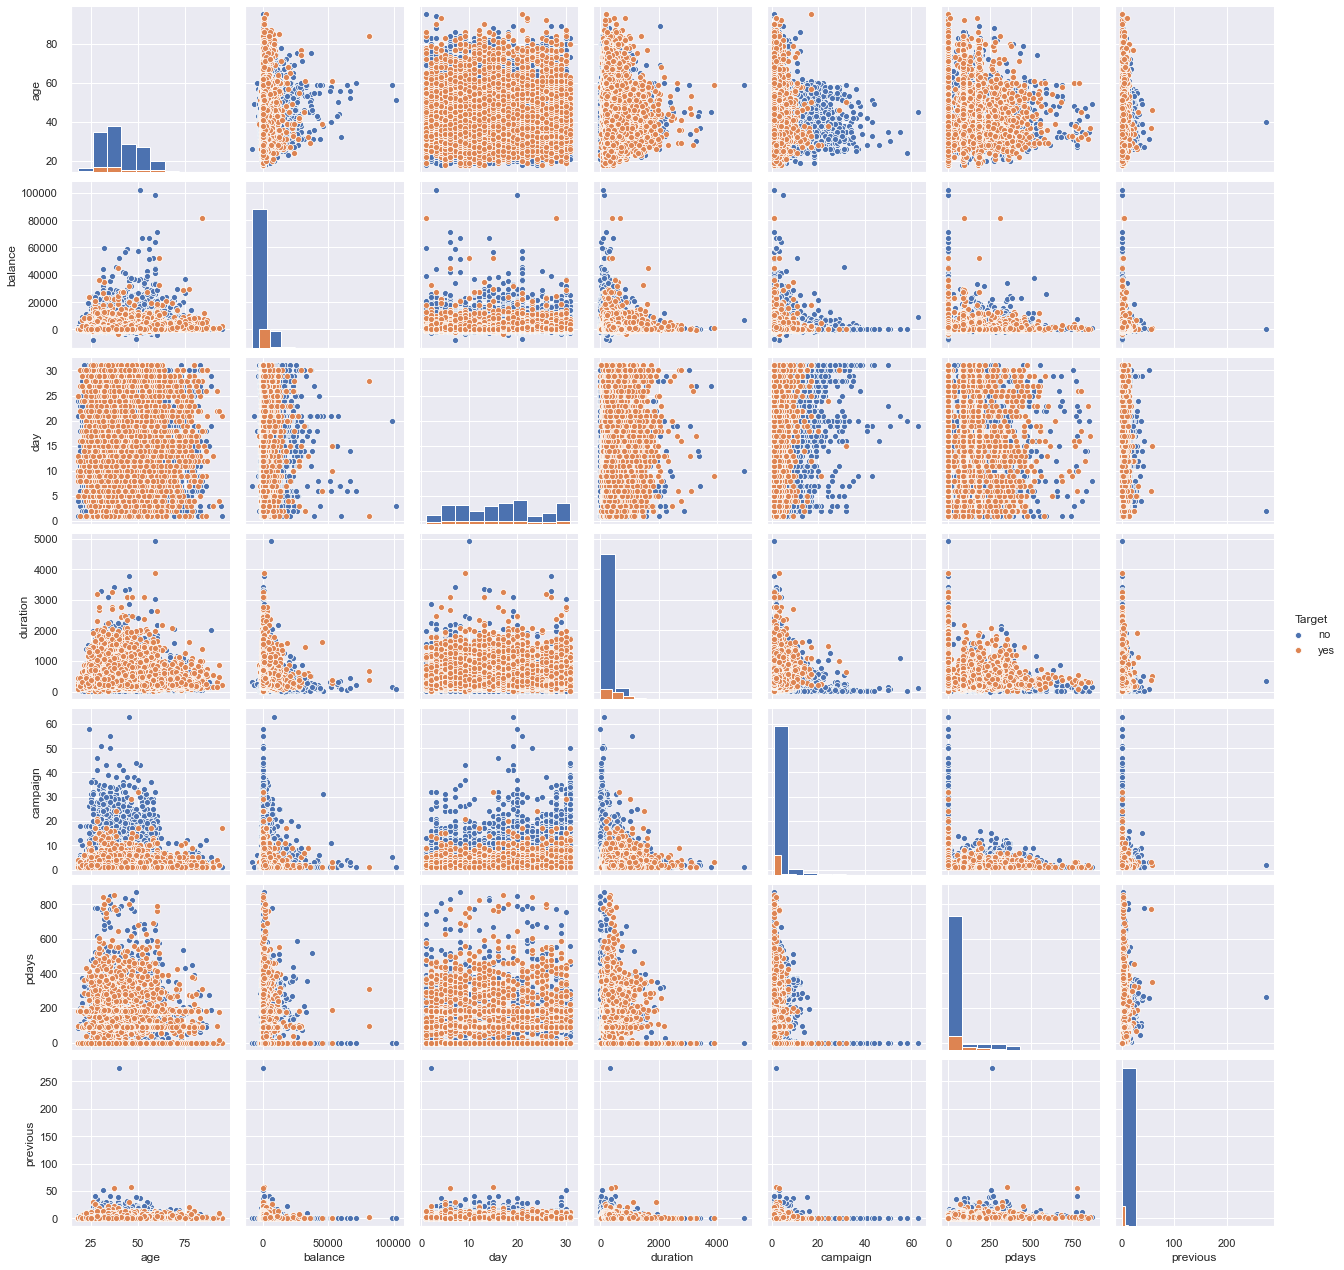

In [440]:
sns.pairplot(data=bank,diag_kind='hist', hue='Target')

In [441]:
pd.crosstab(bank['job'],bank['Target'],normalize ='index')

Target,no,yes
job,,
admin.,0.877973,0.122027
blue-collar,0.927250,0.072750
entrepreneur,0.917283,0.082717
housemaid,0.912097,0.087903
management,0.862444,0.137556
retired,0.772085,0.227915
self-employed,0.881571,0.118429
services,0.911170,0.088830
student,0.713220,0.286780


In [442]:
pd.crosstab(bank['marital'],bank['Target'],normalize ='index')

Target,no,yes
marital,,
divorced,0.880545,0.119455
married,0.898765,0.101235
single,0.850508,0.149492


In [443]:
pd.crosstab(bank['education'],bank['Target'],normalize ='index')

Target,no,yes
education,,
primary,0.913735,0.086265
secondary,0.894406,0.105594
tertiary,0.849936,0.150064
unknown,0.864297,0.135703


In [444]:
pd.crosstab(bank['default'],bank['Target'],normalize ='index')

Target,no,yes
default,,
no,0.882039,0.117961
yes,0.936196,0.063804


In [445]:
pd.crosstab(bank['housing'],bank['Target'],normalize ='index')

Target,no,yes
housing,,
no,0.832976,0.167024
yes,0.923000,0.077000


In [446]:
pd.crosstab(bank['loan'],bank['Target'],normalize ='index')

Target,no,yes
loan,,
no,0.873443,0.126557
yes,0.933186,0.066814


In [447]:
pd.crosstab(bank['contact'],bank['Target'],normalize ='index')

Target,no,yes
contact,,
cellular,0.850811,0.149189
telephone,0.865795,0.134205
unknown,0.959293,0.040707


In [448]:
pd.crosstab(bank['month'],bank['Target'],normalize ='index')

Target,no,yes
month,,
apr,0.803206,0.196794
aug,0.889867,0.110133
dec,0.532710,0.467290
feb,0.833522,0.166478
jan,0.898788,0.101212
jul,0.909065,0.090935
jun,0.897772,0.102228
mar,0.480084,0.519916
may,0.932805,0.067195


In [449]:
pd.crosstab(bank['poutcome'],bank['Target'],normalize ='index')

Target,no,yes
poutcome,,
failure,0.873903,0.126097
other,0.833152,0.166848
success,0.352747,0.647253
unknown,0.908385,0.091615


##### `Insights:`
- Clients who had a successful campaign outcome are significantly more likely to subscribe to a Term Deposit.
- The months of **March**, **September**, **October**, and **December** are significantly more prosperous in terms of Term Deposit subscriptions.

## Get the Data Model Ready

##### Split the data into a Training and Testing data sets

In [450]:
bank = pd.get_dummies(bank)

In [451]:
bank.drop('Target_no', axis=1, inplace=True)

In [452]:
bank.rename(columns = {'Target_yes':'Target'}, inplace = True)

In [453]:
X = bank.drop('Target', axis=1)
Y = bank['Target'].astype('category')

In [454]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=23)
print("{0:0.2f}% data is in training set".format((len(x_train)/len(bank.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(bank.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [455]:
print("Original Target True Values    : {0} ({1:0.2f}%)".format(len(bank.loc[bank['Target'] == 1]), (len(bank.loc[bank['Target'] == 1])/len(bank.index)) * 100))
print("Original Target Loan False Values   : {0} ({1:0.2f}%)".format(len(bank.loc[bank['Target'] == 0]), (len(bank.loc[bank['Target'] == 0])/len(bank.index)) * 100))
print("")
print("Training Target True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Target False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Target True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Target False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Target True Values    : 5289 (11.70%)
Original Target Loan False Values   : 39922 (88.30%)

Training Target True Values    : 3709 (11.72%)
Training Target False Values   : 27938 (88.28%)

Test Target True Values        : 1580 (11.65%)
Test Target False Values       : 11984 (88.35%)



# Logistic Regression

In [456]:
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
y_predict = model.predict(x_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
coef_df

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,intercept
0,-0.001835,0.000016,0.006784,0.004278,-0.090369,-0.000209,0.03644,0.025726,-0.284192,-0.244783,...,1.48751,-0.482609,-0.875414,0.762578,0.893486,-0.774426,-0.620827,1.452368,-0.836534,-0.779419


In [457]:
model_score = model.score(x_test, y_test)
print(model_score)

0.9024624004718372


In [458]:
fi = pd.DataFrame()
fi['Col'] = x_train.columns
fi['Coeff'] = np.round(abs(model.coef_[0]),2)
fi.sort_values(by='Coeff', ascending = False,inplace=True)
fi.head(10)

,Col,Coeff
42,month_mar,1.49
49,poutcome_success,1.45
34,contact_unknown,1.29
39,month_jan,1.14
40,month_jul,0.94
46,month_sep,0.89
44,month_nov,0.88
50,poutcome_unknown,0.84
36,month_aug,0.79
47,poutcome_failure,0.77


In [459]:
fi.tail(10)

,Col,Coeff
24,education_tertiary,0.07
17,job_unemployed,0.05
6,previous,0.04
11,job_management,0.03
7,job_admin.,0.03
2,day,0.01
1,balance,0.00
5,pdays,0.00
3,duration,0.00
0,age,0.00


##### `Insights:`
From the feature importance of the coefficients used in the Logistic Regression model, we can see that certain variables are more important/correlated than others in predicting values:

- Multiple values of **Month** and **poutcome** are the most closely correlated coefficients in creating the model
- **Age**, **Job**, **Day**, and Features about **Previous Contact** (not including **poutcome**) are some of the least important/correlated coefficients in creating the model.

##### Evaluating Logistic Regression Model

In [460]:
def draw_cm(actual,predicted):
    cm = confusion_matrix(actual,predicted)
    sns.heatmap(cm, annot = True, fmt = '.2f', xticklabels = ['no','yes'], yticklabels = ['no','yes'])
    plt.xlabel('Observed')
    plt.ylabel('Predicted')
    plt.show()

Training Accuracy: 0.9022656175940847
Testing Accuracy: 0.9024624004718372 

Confusion Matrix


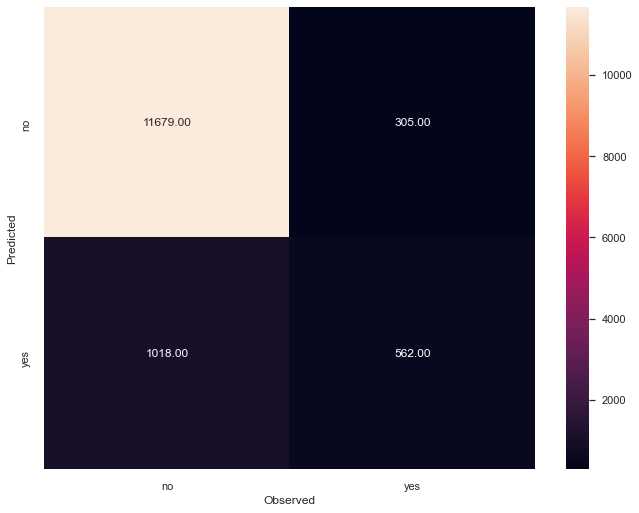

None
Recall: 0.3556962025316456
Precision: 0.6482122260668973
F1 Score: 0.4593379648549244
Roc Auc Score: 0.6651228008652889


In [461]:
print("Training Accuracy:", model.score(x_train,y_train))
print("Testing Accuracy:", model.score(x_test,y_test),'\n')
print("Confusion Matrix")
print(draw_cm(y_test,y_predict))
print("Recall:", recall_score(y_test,y_predict))
print("Precision:", precision_score(y_test,y_predict))
print("F1 Score:", f1_score(y_test,y_predict))
print("Roc Auc Score:", roc_auc_score(y_test,y_predict))

In [462]:
preds_train = model.predict(x_train)
preds_test = model.predict(x_test)

acc_LR = accuracy_score(y_test, preds_test)

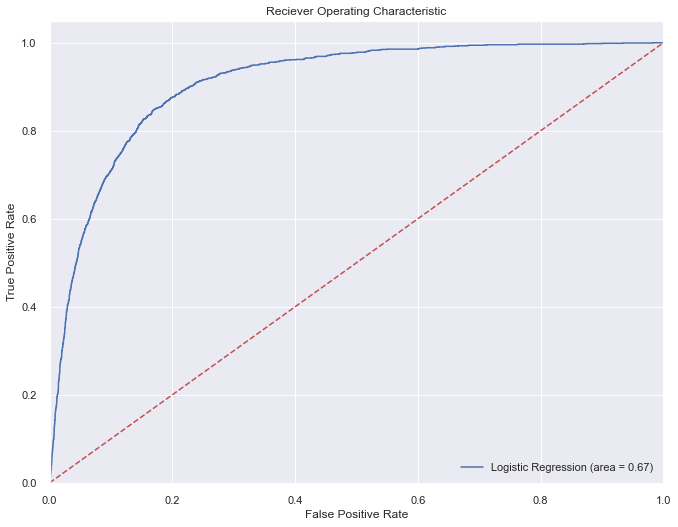

In [463]:
logit_roc_auc = roc_auc_score(y_test, model.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label = 'Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Characteristic')
plt.legend(loc = "lower right")
plt.savefig('Log_ROC')
plt.show()

/Users/thomaswebb/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '
/Users/thomaswebb/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x16929f250>,
       model=None)

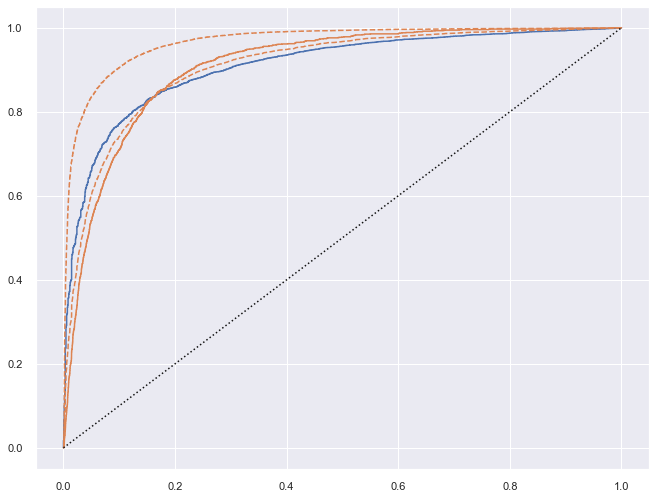

In [464]:
roc = ROCAUC(LogisticRegression(solver="liblinear"))
roc.fit(x_train, y_train)
roc.score(x_test, y_test)
roc

# Decision Tree Classification Model

In [465]:
# Using a GridSearch over a few parameters to find the "best" decision tree.

parameters = {
    'criterion':['gini', 'entropy'],
    'max_depth':range(1,10),
    'min_samples_leaf':range(1,10),
}
dt = DecisionTreeClassifier()
clf = GridSearchCV(dt, parameters)
clf.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 10)})

In [466]:
print(clf.best_params_)

{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 6}


Training Accuracy: 0.9053306790533068
Testing Accuracy: 0.9007667354762607
Confusion Matrix


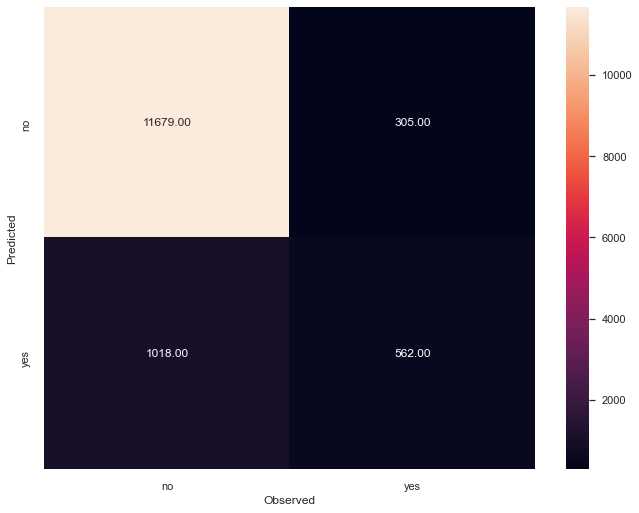

None


In [467]:
# Create a decision tree model based on the results of the gridsearch
clf_grid = DecisionTreeClassifier(criterion = 'entropy',
                                  max_depth=6, 
                                  min_samples_leaf=6)
clf_grid.fit(x_train, y_train)
print("Training Accuracy:", clf_grid.score(x_train, y_train))
print("Testing Accuracy:", clf_grid.score(x_test, y_test))
print("Confusion Matrix")
print(draw_cm(y_test,y_predict))

In [468]:
preds_train = clf_grid.predict(x_train)
preds_test = clf_grid.predict(x_test)

acc_DT = accuracy_score(y_test, preds_test)

In [469]:
# Create a dataframe to store results in, for use as a comparison at the end
resultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT})
resultsDf = resultsDf[['Method', 'accuracy']]

In [470]:
# Update results dataframe with Logistic Regression model
tempResultsDf = pd.DataFrame({'Method':['Logistic Regression'], 'accuracy': [acc_LR]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]

Text(0.5, 0, 'max_depth')

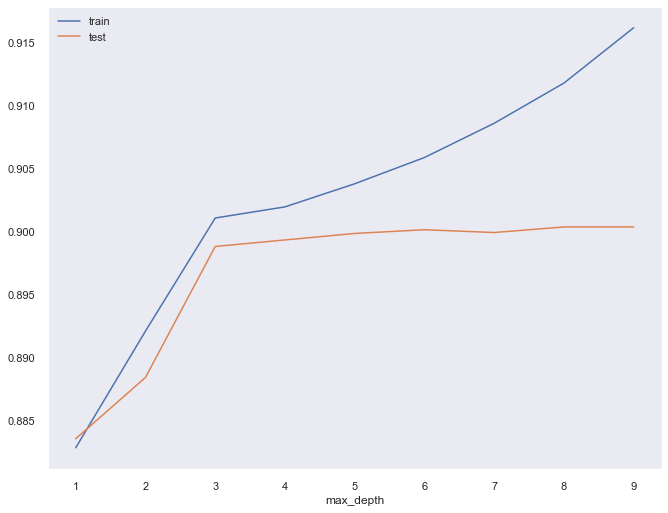

In [471]:
# Create a graph that showcases the affect of max_depth on the accuracy of the model
acc_est = pd.DataFrame(index=range(1,10), columns=['train','test'])
for est in range(1, 10):
    dtcl_est = DecisionTreeClassifier(criterion = 'entropy',
                                      max_depth=est, 
                                      random_state=22)
    dtcl_est.fit(x_train, y_train)
    preds_dtcl_train = dtcl_est.predict(x_train)
    acc_est.loc[est, 'train'] = accuracy_score(y_train, preds_dtcl_train)
    
    # Do the same for test data
    preds_dtcl_test = dtcl_est.predict(x_test)
    acc_est.loc[est, 'test'] = accuracy_score(y_test, preds_dtcl_test)

acc_est.plot()
plt.grid()
plt.xlabel('max_depth')

/Users/thomaswebb/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '
/Users/thomaswebb/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x1592647f0>,
       model=None)

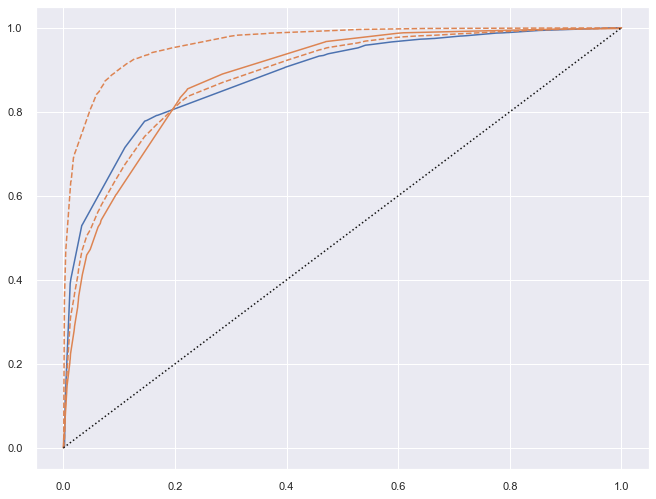

In [472]:
roc = ROCAUC(DecisionTreeClassifier(criterion = 'entropy', max_depth=6, min_samples_leaf=6))
roc.fit(x_train, y_train)
roc.score(x_test, y_test)
roc

# Random Forest Ensemble Classification Model

In [473]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(x_train, y_train)

In [474]:
pred_RF = rfcl.predict(x_test)
acc_RF = accuracy_score(y_test, pred_RF)

Training Accuracy: 0.9997472114260435
Testing Accuracy: 0.9064435269831908
Confusion Matrix


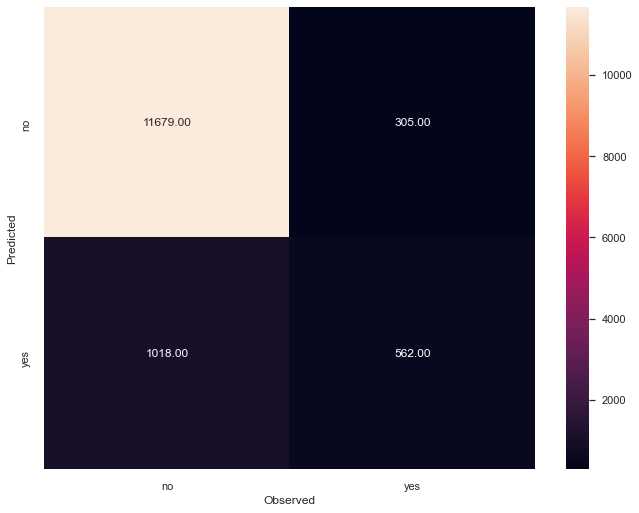

None


In [475]:
print("Training Accuracy:", rfcl.score(x_train, y_train))
print("Testing Accuracy:", rfcl.score(x_test, y_test))
print("Confusion Matrix")
print(draw_cm(y_test,y_predict))

In [476]:
# Update results dataframe with Random Forest model
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy': [acc_RF]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]

Text(0.5, 0, 'n_estimators')

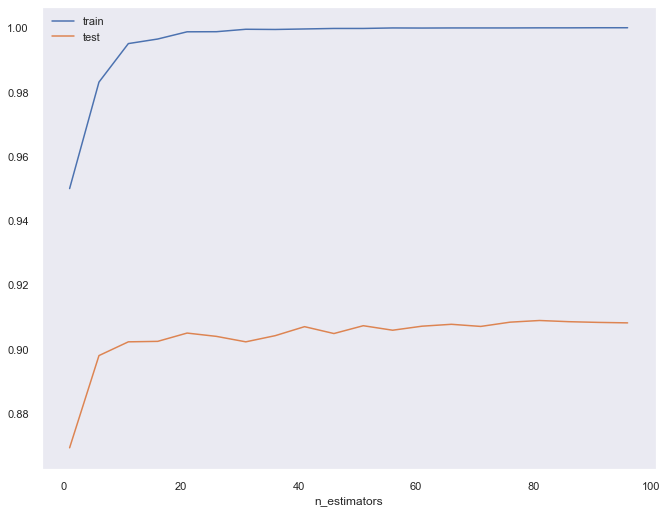

In [477]:
# Create a graph that showcases the affect of n_estimators on the accuracy of the model
acc_est = pd.DataFrame(index=range(1,100,5), columns=['train','test'])
for est in range(1,100,5):
    rfcl_est = RandomForestClassifier(n_estimators = est)
    rfcl_est.fit(x_train, y_train)
    preds_rfcl_train = rfcl_est.predict(x_train)
    acc_est.loc[est, 'train'] = accuracy_score(y_train, preds_rfcl_train)
    
    # Do the same for test data
    preds_rfcl_test = rfcl_est.predict(x_test)
    acc_est.loc[est, 'test'] = accuracy_score(y_test, preds_rfcl_test)

acc_est.plot()
plt.grid()
plt.xlabel('n_estimators')

/Users/thomaswebb/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '
/Users/thomaswebb/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x180dc84f0>,
       model=None)

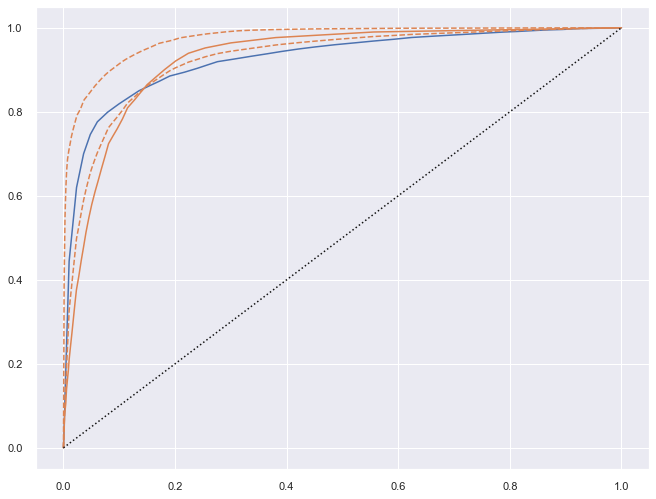

In [478]:
roc = ROCAUC(RandomForestClassifier(n_estimators = 50))
roc.fit(x_train, y_train)
roc.score(x_test, y_test)
roc

# AdaBoost Ensemble Classification Model

In [479]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators = 100, learning_rate=0.1, random_state=22)
abcl = abcl.fit(x_train, y_train)

In [480]:
pred_AB =abcl.predict(x_test)
acc_AB = accuracy_score(y_test, pred_AB)

Training Accuracy: 0.8956615160994723
Testing Accuracy: 0.8962695370097317
Confusion Matrix


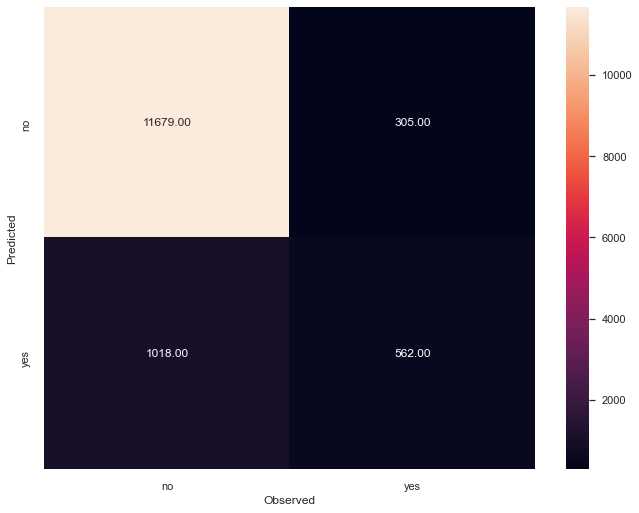

None


In [481]:
print("Training Accuracy:", abcl.score(x_train, y_train))
print("Testing Accuracy:", abcl.score(x_test, y_test))
print("Confusion Matrix")
print(draw_cm(y_test,y_predict))

In [482]:
# Update results dataframe with Adaboost model
tempResultsDf = pd.DataFrame({'Method':['Adaboost'], 'accuracy': [acc_AB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]

Text(0.5, 0, 'n_estimators')

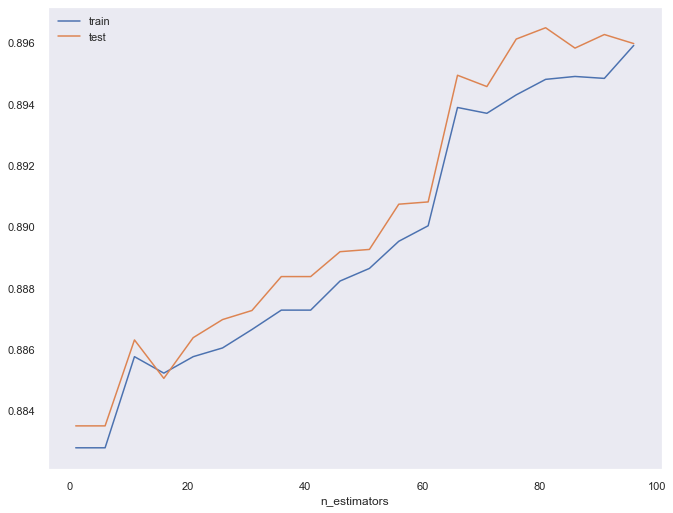

In [483]:
# Create a graph that showcases the affect of n_estimators on the accuracy of the model
acc_est = pd.DataFrame(index=range(1,100,5), columns=['train','test'])
for est in range(1,100,5):
    abcl_est = AdaBoostClassifier(n_estimators = est, learning_rate=0.1, random_state=22)
    abcl_est.fit(x_train, y_train)
    preds_abcl_train = abcl_est.predict(x_train)
    acc_est.loc[est, 'train'] = accuracy_score(y_train, preds_abcl_train)
    
    # Do the same for test data
    preds_abcl_test = abcl_est.predict(x_test)
    acc_est.loc[est, 'test'] = accuracy_score(y_test, preds_abcl_test)

acc_est.plot()
plt.grid()
plt.xlabel('n_estimators')

/Users/thomaswebb/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '
/Users/thomaswebb/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x182c2ff70>,
       model=None)

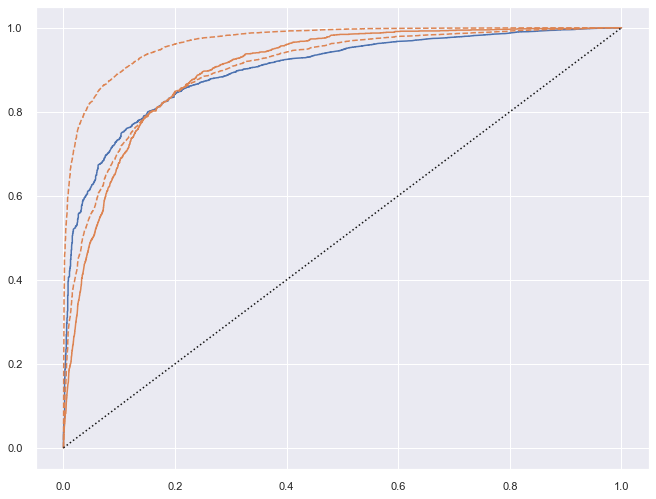

In [484]:
roc = ROCAUC(AdaBoostClassifier(n_estimators= 100, learning_rate=0.1, random_state=22))
roc.fit(x_train, y_train)
roc.score(x_test, y_test)
roc

# Bagging Ensemble Classification Model

In [485]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bgcl = bgcl.fit(x_train, y_train)

In [486]:
pred_BG = bgcl.predict(x_test)
acc_BG = accuracy_score(y_test, pred_BG)

Training Accuracy: 0.9939014756533004
Testing Accuracy: 0.9062223532881156
Confusion Matrix


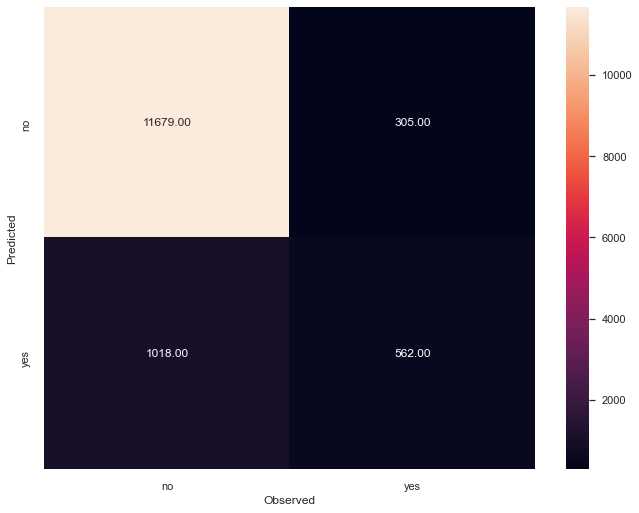

None


In [487]:
print("Training Accuracy:", bgcl.score(x_train, y_train))
print("Testing Accuracy:", bgcl.score(x_test, y_test))
print("Confusion Matrix")
print(draw_cm(y_test,y_predict))

In [488]:
# Update results dataframe with Bagging model
tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'accuracy': [acc_BG]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]

Text(0.5, 0, 'n_estimators')

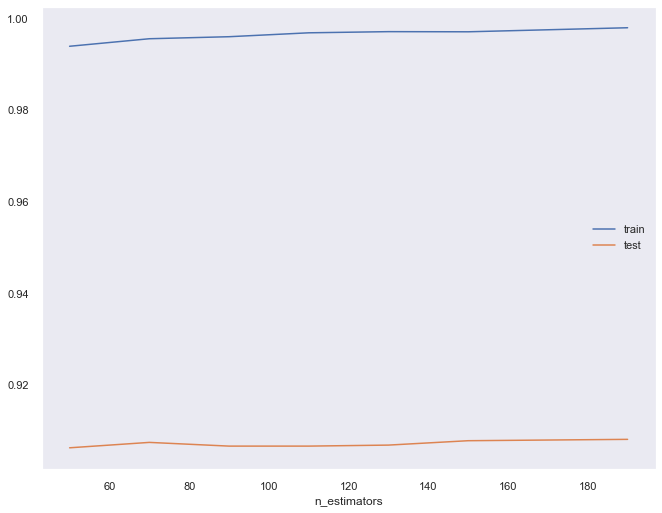

In [489]:
# Create a graph that showcases the affect of n_estimators on the accuracy of the model
acc_est = pd.DataFrame(index=range(50,200,20), columns=['train','test'])
for est in range(50,200,20):
    bgcl_est = BaggingClassifier(n_estimators=est, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
    bgcl_est.fit(x_train, y_train)
    preds_bgcl_train = bgcl_est.predict(x_train)
    acc_est.loc[est, 'train'] = accuracy_score(y_train, preds_bgcl_train)
    
    # Do the same for test data
    preds_bgcl_test = bgcl_est.predict(x_test)
    acc_est.loc[est, 'test'] = accuracy_score(y_test, preds_bgcl_test)

acc_est.plot()
plt.grid()
plt.xlabel('n_estimators')

##### `Insights:`
It appears that when using a bagging classifier model on this dataset, the n_estimators parameter has little to no influence on the prediction accuracy. No matter the n_estimators value, the predictions have relatively similar accuracy and are oversampled.

/Users/thomaswebb/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '
/Users/thomaswebb/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x14a1a8400>,
       model=None)

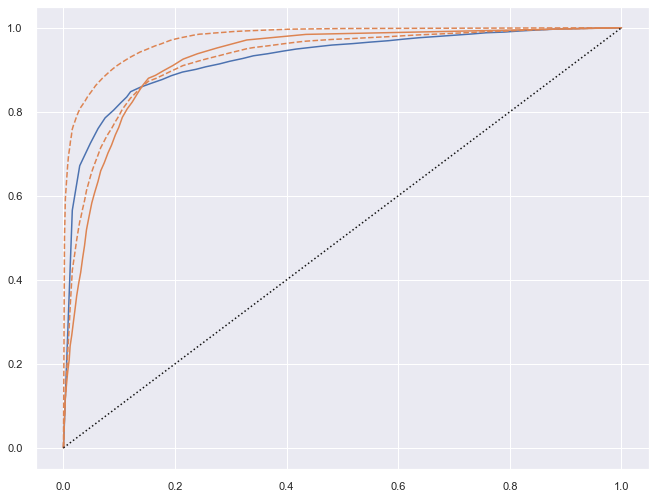

In [490]:
roc = ROCAUC(BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22))
roc.fit(x_train, y_train)
roc.score(x_test, y_test)
roc

# Gradient Boost Ensemble Classification Model

In [491]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22)
gbcl = gbcl.fit(x_train, y_train)

In [492]:
pred_GB = gbcl.predict(x_test)
acc_GB = accuracy_score(y_test, pred_GB)

Training Accuracy: 0.9077321705058932
Testing Accuracy: 0.9048215865526393
Confusion Matrix


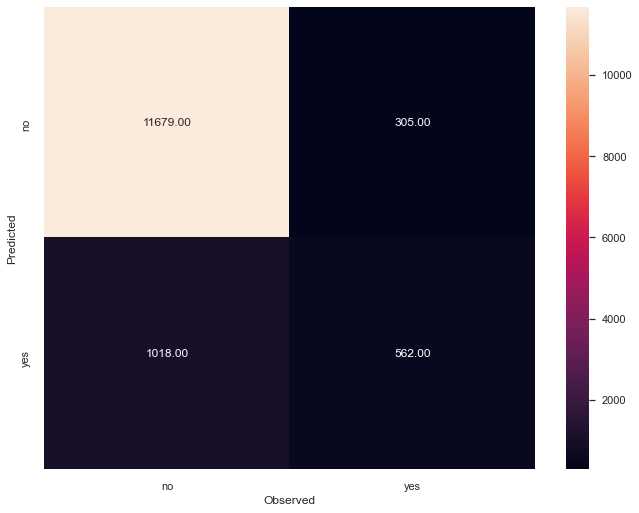

None


In [493]:
print("Training Accuracy:", gbcl.score(x_train, y_train))
print("Testing Accuracy:", gbcl.score(x_test, y_test))
print("Confusion Matrix")
print(draw_cm(y_test,y_predict))

In [494]:
# Update results dataframe with Gradient Boost model
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost'], 'accuracy': [acc_GB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]

Text(0.5, 0, 'n_estimators')

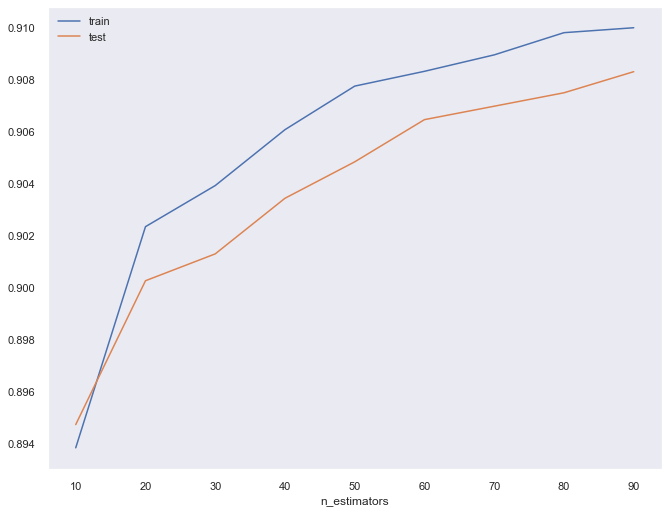

In [495]:
# Create a graph that showcases the affect of n_estimators on the accuracy of the model
acc_est = pd.DataFrame(index=range(10,100,10), columns=['train','test'])
for est in range(10,100,10):
    gbcl_est = GradientBoostingClassifier(n_estimators = est, learning_rate = 0.1, random_state=22)
    gbcl_est.fit(x_train, y_train)
    preds_gbcl_train = gbcl_est.predict(x_train)
    acc_est.loc[est, 'train'] = accuracy_score(y_train, preds_gbcl_train)
    
    # Do the same for test data
    preds_gbcl_test = gbcl_est.predict(x_test)
    acc_est.loc[est, 'test'] = accuracy_score(y_test, preds_gbcl_test)

acc_est.plot()
plt.grid()
plt.xlabel('n_estimators')

/Users/thomaswebb/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '
/Users/thomaswebb/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x173a1b130>,
       model=None)

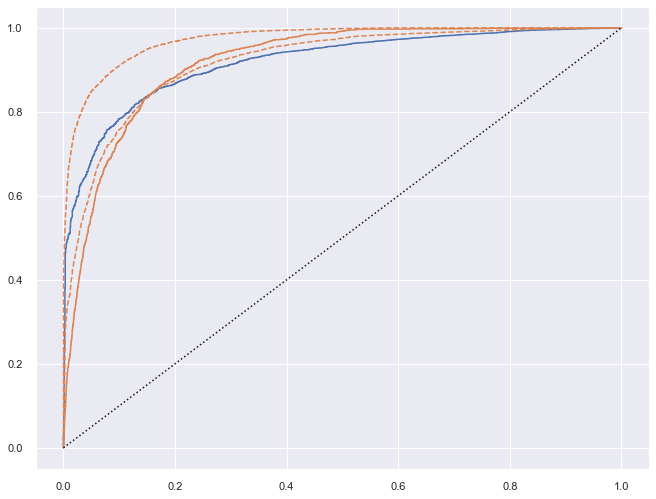

In [496]:
roc = ROCAUC(GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22))
roc.fit(x_train, y_train)
roc.score(x_test, y_test)
roc

# Results and Comparision of Classification Models

In [497]:
# Print all results in order of most to least accurate
resultsDf.sort_values(by=['accuracy'], ascending=False) 

,Method,accuracy
0,Random Forest,0.906444
0,Bagging,0.906222
0,Gradient Boost,0.904822
0,Logistic Regression,0.902462
0,Decision Tree,0.900767
0,Adaboost,0.896270


##### `Insights:`
From the results DataFrame above we can conclude that of all the ensemble techniques demonstrated:
- All of our ensemble technique created relatively strong learning models as the accuracies are all within **1%** of each other, and around **90%** accuracy.
- The **Random Forest** model is our **1st place** for being most accurate.
- The **AdaBoost** model (or Adaptive Boosting) is our **last place** method for being least accurate.
- Even though **Random Forest** is our most accurate classification model, we can tell from the discrepancy between training and testing data that the model is slightly oversampled.
- The **Bagging** model is also slightly oversampled according to the discrepancy between training and testing data.
